### CNN 기초

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sess = tf.InteractiveSession()

In [7]:
image = np.array([[[[1],[2],[3]],
                  [[4],[5],[6]],
                  [[7],[8],[9]]]], dtype = np.float32)

In [8]:
print(image, image.shape, image.ndim)

[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]] (1, 3, 3, 1) 4


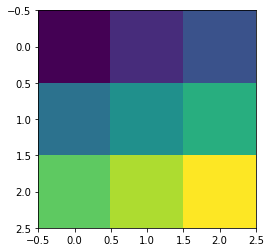

In [9]:
plt.imshow(image.reshape(3, 3))

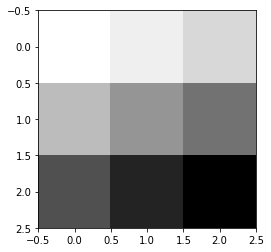

In [29]:
plt.imshow(image.reshape(3, 3), cmap = 'Greys')

In [30]:
weight = tf.constant([[[[1.]], [[1.]]],
                     [[[1.]], [[1.]]]])

In [31]:
print(weight, weight.shape)

Tensor("Const_1:0", shape=(2, 2, 1, 1), dtype=float32) (2, 2, 1, 1)


###### paddind = 'VALID'로 한 경우

In [32]:
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='VALID')

In [33]:
conv2d_img = conv2d.eval()

In [34]:
print(conv2d_img, conv2d_img.shape)

[[[[12.]
   [16.]]

  [[24.]
   [28.]]]] (1, 2, 2, 1)


[[12. 16.]
 [24. 28.]]


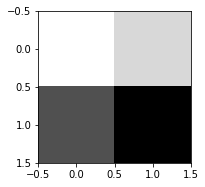

In [35]:
for i, one_img in enumerate(conv2d_img) :
    print(one_img.reshape(2, 2))
    plt.subplot(1, 2, i + 1)
    plt.imshow(one_img.reshape(2, 2), cmap='Greys')

###### padding = 'SAME' 으로 한 경우 이미지의 shape와 이미지

In [36]:
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')

In [37]:
conv2d_img = conv2d.eval()

In [38]:
print(conv2d_img, conv2d_img.shape)

[[[[12.]
   [16.]
   [ 9.]]

  [[24.]
   [28.]
   [15.]]

  [[15.]
   [17.]
   [ 9.]]]] (1, 3, 3, 1)


[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


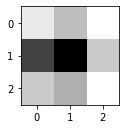

In [39]:
for i, one_img in enumerate(conv2d_img) :
    print(one_img.reshape(3, 3))
    plt.subplot(1, 3, i + 1)
    plt.imshow(one_img.reshape(3, 3), cmap='Greys')

In [41]:
# filter가 여러 개

In [42]:
b = np.arange(24).reshape(2, 3, 4)

In [43]:
print(b)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


###### filter 작성

In [44]:
weight = tf.constant([[[[1., 10., -1]], [[1., 10., -1]]],
                     [[[1., 10., -1]], [[1., 10., -1]]]])

In [45]:
print(weight.shape)

(2, 2, 1, 3)


In [53]:
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')

In [54]:
conv2d_img = conv2d.eval()

In [55]:
print(conv2d_img, conv2d_img.shape)

[[[[ 12. 120. -12.]
   [ 16. 160. -16.]
   [  9.  90.  -9.]]

  [[ 24. 240. -24.]
   [ 28. 280. -28.]
   [ 15. 150. -15.]]

  [[ 15. 150. -15.]
   [ 17. 170. -17.]
   [  9.  90.  -9.]]]] (1, 3, 3, 3)


In [56]:
conv2d_img = np.swapaxes(conv2d_img, 0, 3) # 정방행렬로 수정
print(conv2d_img.shape)

(3, 3, 3, 1)


[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


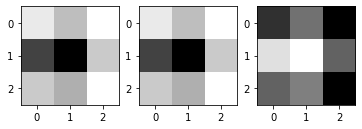

In [57]:
for i, one_img in enumerate(conv2d_img) :
    print(one_img.reshape(3, 3))
    plt.subplot(1, 3, i + 1)
    plt.imshow(one_img.reshape(3, 3), cmap='Greys')

###### Max Pooling : VALID

In [58]:
image = np.array([[[[4], [3]],
                  [[2], [1]]]], dtype = np.float32)

In [59]:
print(image, image.shape)

[[[[4.]
   [3.]]

  [[2.]
   [1.]]]] (1, 2, 2, 1)


In [60]:
pool = tf.nn.max_pool(image, ksize = [1, 2, 2, 1], strides = [1, 1, 1, 1], padding = 'VALID')

In [61]:
print(pool.shape)

(1, 1, 1, 1)


###### Max Pooling : SAME

In [62]:
image = np.array([[[[4], [3]],
                  [[2], [1]]]], dtype = np.float32)

In [63]:
print(image, image.shape)

[[[[4.]
   [3.]]

  [[2.]
   [1.]]]] (1, 2, 2, 1)


In [64]:
pool = tf.nn.max_pool(image, ksize = [1, 2, 2, 1], strides = [1, 1, 1, 1], padding = 'SAME')

In [65]:
print(pool.shape)

(1, 2, 2, 1)


In [66]:
print(pool.eval())

[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


In [67]:
# MNIST의 데이터를 이용해 CNN 이미지 분석

In [68]:
from tensorflow.examples.tutorials.mnist import input_data

In [72]:
mnist = input_data.read_data_sets('data/', one_hot = True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


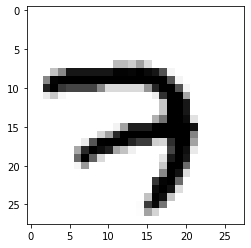

In [73]:
img = mnist.train.images[0].reshape(28, 28)
plt.imshow(img, cmap='Greys')

In [74]:
sess = tf.InteractiveSession()

C:\Python\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [75]:
img = img.reshape(-1, 28, 28, 1)

In [76]:
print(img.shape)

(1, 28, 28, 1)


In [78]:
# 필터 크기 : 3 X 3
W1 = tf.Variable(tf.truncated_normal([3, 3, 1, 5]))

In [79]:
conv2d = tf.nn.conv2d(img, W1, strides = [1, 2, 2, 1], padding = 'SAME')

In [80]:
sess.run(tf.global_variables_initializer())

In [81]:
conv2d_img = conv2d.eval()

In [84]:
for i, one_img in enumerate(conv2d_img) :
    print(one_img.reshape(28, 28))
    plt.subplot(1, 5, i + 1)
    plt.imshow(one_img.reshape(28, 28), cmap='Greys')

ValueError: cannot reshape array of size 980 into shape (28,28)